In [42]:
import geopandas as gpd
import geojson
import json
from OSMPythonTools.nominatim import Nominatim
from OSMPythonTools.overpass import overpassQueryBuilder

# shoudn't be needed but let's see
#import geojsonio



In [2]:
from OSMPythonTools.overpass import Overpass

# add new endpoint because default is not reachable
overpass = Overpass(endpoint='https://overpass.kumi.systems/api/interpreter')

### Try out Overpass API from python

In [3]:
nominatim = Nominatim()
areaId = nominatim.query('berlin friedrichshain kreuzberg').areaId()
areaId

3600055764

In [30]:
overpass = Overpass()
query = overpassQueryBuilder(area=areaId, elementType='node', selector='"natural"="tree"', out='body')
result = overpass.query(query)




In [53]:
dir(result)

['_OverpassResult__count',
 '_OverpassResult__elementsOfType',
 '_OverpassResult__get',
 '_OverpassResult__get2',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_elements',
 '_json',
 '_queryString',
 'areas',
 'copyright',
 'countAreas',
 'countElements',
 'countNodes',
 'countRelations',
 'countWays',
 'elements',
 'generator',
 'isValid',
 'nodes',
 'queryString',
 'relations',
 'remark',
 'timestamp_area_base',
 'timestamp_osm_base',
 'toJSON',
 'version',
 'ways']

In [57]:
# You can convert the OverpassAPI-result ("result") directly into JSON
json_object = result.toJSON()
json_object

{'version': 0.6,
 'generator': 'Overpass API 0.7.56.9 76e5016d',
 'osm3s': {'timestamp_osm_base': '2021-10-11T09:51:28Z',
  'timestamp_areas_base': '2021-10-11T05:43:58Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 340280441,
   'lat': 52.4866309,
   'lon': 13.3847335,
   'tags': {'leaf_cycle': 'deciduous',
    'leaf_type': 'broadleaved',
    'natural': 'tree'}},
  {'type': 'node',
   'id': 341289624,
   'lat': 52.4878555,
   'lon': 13.3839702,
   'tags': {'leaf_cycle': 'deciduous',
    'leaf_type': 'broadleaved',
    'monument': 'yes',
    'natural': 'tree',
    'note:de': 'Naturdenkmal'}},
  {'type': 'node',
   'id': 371510846,
   'lat': 52.4924234,
   'lon': 13.4778593,
   'tags': {'denotation': 'natural_monument',
    'inscription': 'Naturdenkmal',
    'natural': 'tree'}},
  {'type': 'node',
   'id': 371510849,
   'lat': 52.4918878,
   'lon': 13.4783428,
   'tags

In [59]:
json_object['element']

KeyError: 'element'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [56]:
map['elements']

[{'type': 'node',
  'id': 340280441,
  'lat': 52.4866309,
  'lon': 13.3847335,
  'tags': {'leaf_cycle': 'deciduous',
   'leaf_type': 'broadleaved',
   'natural': 'tree'}},
 {'type': 'node',
  'id': 341289624,
  'lat': 52.4878555,
  'lon': 13.3839702,
  'tags': {'leaf_cycle': 'deciduous',
   'leaf_type': 'broadleaved',
   'monument': 'yes',
   'natural': 'tree',
   'note:de': 'Naturdenkmal'}},
 {'type': 'node',
  'id': 371510846,
  'lat': 52.4924234,
  'lon': 13.4778593,
  'tags': {'denotation': 'natural_monument',
   'inscription': 'Naturdenkmal',
   'natural': 'tree'}},
 {'type': 'node',
  'id': 371510849,
  'lat': 52.4918878,
  'lon': 13.4783428,
  'tags': {'denotation': 'natural_monument',
   'name': 'Naturdenkmal',
   'natural': 'tree'}},
 {'type': 'node',
  'id': 582182119,
  'lat': 52.4967754,
  'lon': 13.4743614,
  'tags': {'denotation': 'urban',
   'genus': 'Populus',
   'genus:de': 'Pappel',
   'leaf_type': 'broadleaved',
   'natural': 'tree',
   'ref': '51'}},
 {'type': 'node

In [44]:
dir(result)

['_OverpassResult__count',
 '_OverpassResult__elementsOfType',
 '_OverpassResult__get',
 '_OverpassResult__get2',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_elements',
 '_json',
 '_queryString',
 'areas',
 'copyright',
 'countAreas',
 'countElements',
 'countNodes',
 'countRelations',
 'countWays',
 'elements',
 'generator',
 'isValid',
 'nodes',
 'queryString',
 'relations',
 'remark',
 'timestamp_area_base',
 'timestamp_osm_base',
 'toJSON',
 'version',
 'ways']

In [43]:
geojson_str = geojson.dumps(result)

TypeError: Object of type OverpassResult is not JSON serializable

In [ ]:


# dump as file, if you want to save it in file
with open("./test.geo.json",mode="w") as f:
  geojson.dump(res,f)

In [31]:
result.countElements()


13429

In [32]:
result.generator()


'Overpass API 0.7.56.9 76e5016d'

In [33]:
result.isValid()


True

In [37]:
type(result)

OSMPythonTools.overpass.OverpassResult

In [40]:
map = result.toJSON()["elements"][0]
type(map)

dict

In [35]:
firstElement = result.toJSON()["elements"][0]
print(firstElement)

{'type': 'node', 'id': 340280441, 'lat': 52.4866309, 'lon': 13.3847335, 'tags': {'leaf_cycle': 'deciduous', 'leaf_type': 'broadleaved', 'natural': 'tree'}}


### Read geojson files

In [36]:
firstElement.geometry()

AttributeError: 'dict' object has no attribute 'geometry'

In [28]:
result.plot()

AttributeError: 'OverpassResult' object has no attribute 'plot'

In [7]:
parken_disabled = gpd.read_file("../data/raw/friedrichshain-kreuzberg/parking_spaces_disabled_persons.csv", delimiter=";")

In [14]:
# parken_gesamt = gpd.read_file("data/raw/friedrichshain-kreuzberg/qgis-parking-data-with-database/parken_gesamt.geojson")
parken_gesamt = gpd.read_file("../data/raw/friedrichshain-kreuzberg/counted_parking-fk.geojson")

In [15]:
parken_gesamt.head(2)

,id,anzahl,elemid,elemname,elemtyp,klasse,klassennam,laenge,parkart,geometry
0,1,27.0,89056,Polylinie,1401,2,OE_KOSTENPF,64.5509,None,"MULTILINESTRING ((389990.378 5816959.153, 3900..."
1,2,NaN,89058,Polylinie,1401,7,OE_KEIN_ABSTELL,11.5184,None,"MULTILINESTRING ((390054.447 5816951.418, 3900..."


In [ ]:
# parken_gesamt.WEITERE_INFORMATIONEN

In [16]:
parken_gesamt_dict = json.loads(parken_gesamt.to_json())

In [17]:
parken_gesamt_dict["features"][:4]

[{'id': '0',
  'type': 'Feature',
  'properties': {'anzahl': 27.0,
   'elemid': 89056,
   'elemname': 'Polylinie',
   'elemtyp': 1401,
   'id': 1,
   'klasse': 2,
   'klassennam': 'OE_KOSTENPF',
   'laenge': 64.5509,
   'parkart': None},
  'geometry': {'type': 'MultiLineString',
   'coordinates': [[[389990.378, 5816959.153], [390054.447, 5816951.418]]]}},
 {'id': '1',
  'type': 'Feature',
  'properties': {'anzahl': None,
   'elemid': 89058,
   'elemname': 'Polylinie',
   'elemtyp': 1401,
   'id': 2,
   'klasse': 7,
   'klassennam': 'OE_KEIN_ABSTELL',
   'laenge': 11.5184,
   'parkart': None},
  'geometry': {'type': 'MultiLineString',
   'coordinates': [[[390054.447, 5816951.418], [390065.884, 5816950.076]]]}},
 {'id': '2',
  'type': 'Feature',
  'properties': {'anzahl': 1.0,
   'elemid': 89060,
   'elemname': 'Polylinie',
   'elemtyp': 1401,
   'id': 3,
   'klasse': 4,
   'klassennam': 'OE_NUTZER',
   'laenge': 12.1363,
   'parkart': None},
  'geometry': {'type': 'MultiLineString',
   

In [18]:
parken_gesamt_dict["features"][:4]

[{'id': '0',
  'type': 'Feature',
  'properties': {'anzahl': 27.0,
   'elemid': 89056,
   'elemname': 'Polylinie',
   'elemtyp': 1401,
   'id': 1,
   'klasse': 2,
   'klassennam': 'OE_KOSTENPF',
   'laenge': 64.5509,
   'parkart': None},
  'geometry': {'type': 'MultiLineString',
   'coordinates': [[[389990.378, 5816959.153], [390054.447, 5816951.418]]]}},
 {'id': '1',
  'type': 'Feature',
  'properties': {'anzahl': None,
   'elemid': 89058,
   'elemname': 'Polylinie',
   'elemtyp': 1401,
   'id': 2,
   'klasse': 7,
   'klassennam': 'OE_KEIN_ABSTELL',
   'laenge': 11.5184,
   'parkart': None},
  'geometry': {'type': 'MultiLineString',
   'coordinates': [[[390054.447, 5816951.418], [390065.884, 5816950.076]]]}},
 {'id': '2',
  'type': 'Feature',
  'properties': {'anzahl': 1.0,
   'elemid': 89060,
   'elemname': 'Polylinie',
   'elemtyp': 1401,
   'id': 3,
   'klasse': 4,
   'klassennam': 'OE_NUTZER',
   'laenge': 12.1363,
   'parkart': None},
  'geometry': {'type': 'MultiLineString',
   

In [ ]:
# geojsonio.display(parken_gesamt.to_json(), force_gist=False)
# embed(parken_gesamt.to_json())

<AxesSubplot:>

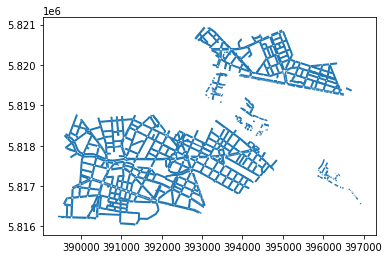

In [21]:
parken_gesamt.plot()

In [23]:
# coord = parken_gesamt.GPS_KOORDINATEN.str.split(",", expand=True).rename(columns={0: "latitude", 1: "longitude"})
# parken_gesamt.geometry =  gpd.GeoSeries.from_xy(parken_gesamt.GPS_LON, parken_gesamt.GPS_LAT)
# parken_gesamt = parken_gesamt.drop(columns=["GPS_KOORDINATEN", "GPS_LAT", "GPS_LON"])

AttributeError: 'GeoDataFrame' object has no attribute 'GPS_KOORDINATEN'

In [22]:
# parken_gesamt.geometry = parken_gesamt.geometry.astype('object')
parken_gesamt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          3791 non-null   int64   
 1   anzahl      2609 non-null   float64 
 2   elemid      3791 non-null   int64   
 3   elemname    3791 non-null   object  
 4   elemtyp     3791 non-null   int64   
 5   klasse      3791 non-null   int64   
 6   klassennam  3791 non-null   object  
 7   laenge      3791 non-null   float64 
 8   parkart     202 non-null    object  
 9   geometry    3791 non-null   geometry
dtypes: float64(2), geometry(1), int64(4), object(3)
memory usage: 296.3+ KB


In [ ]:
json.dump(json_file, open("../data/raw/friedrichshain-kreuzberg/parking_spaces_disabled_persons.geojson", "w+"))

In [ ]:
json_file = json.loads(parken_gesamt.to_json())


In [25]:
m = parken_gesamt.explore(tiles="CartoDB positron")
m


In [ ]:
m.save("parken_map.html")

In [ ]:
import io
from PIL import Image

img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')